# Image Segmentation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap='gray'):
    fig= plt.figure(figsize=(12,10))
    ax= fig.add_subplot(111)
    ax.imshow(img, cmap)

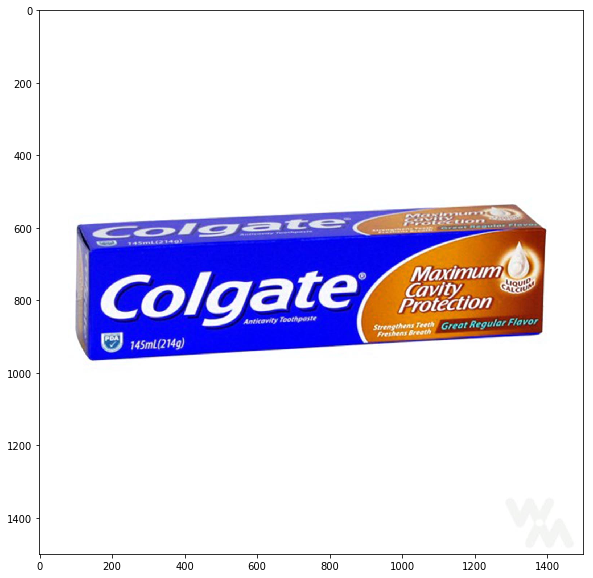

In [4]:
sep_coin= cv2.imread('coc.jpg')
display(sep_coin)

In [6]:
#Median Blur 
sep_blur= cv2.medianBlur(sep_coin, 25)
#Garyscale
gray_sep_coins= cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
#Binary threshold


In [11]:
ret, sep_threshold= cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
#Find contours
#image, contours, hierarchy= cv2.findContours(sep_threshold.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


In [8]:
image ,contours, hierarchy = cv2.findContours(gray_sep_coins, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [9]:
for i in range(len(contours)):
    if hierarchy[0][i][3]== -1:
        cv2.drawContours(sep_coin, contours, i, (255,0,0), 10)

NameError: name 'contours' is not defined

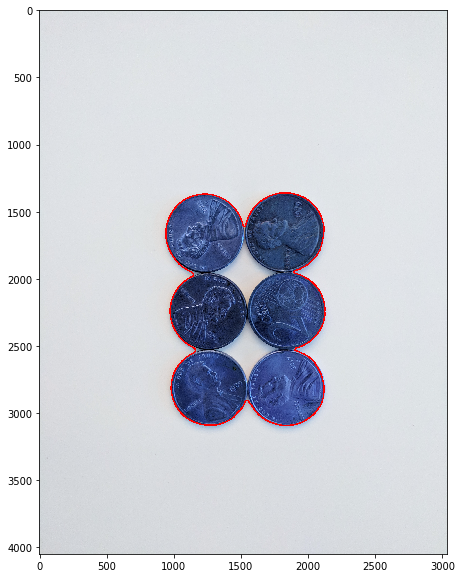

In [6]:
display(sep_coin)

# Watershed Algo

In [21]:
img= cv2.imread('C:\\Users\\HP\\Downloads\\Dataset\\Computer-Vision-with-Python\\DATA/pennies.jpg')

In [23]:
img= cv2.medianBlur(img, 35)

In [24]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

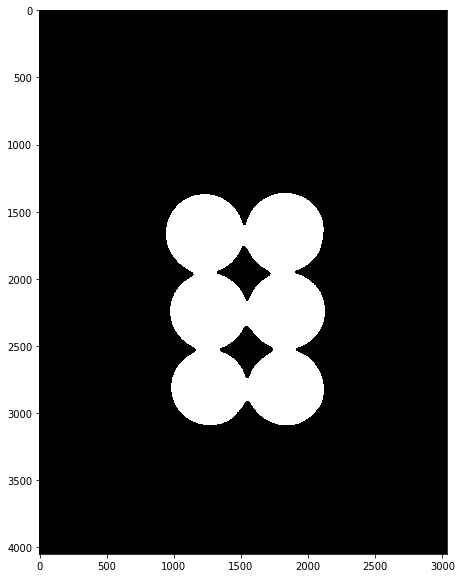

In [25]:
ret, thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #otsu method of thresholding
display(thresh)

In [26]:
#noise Removal (optional)
kernel= np.ones((3,3), np.uint8)

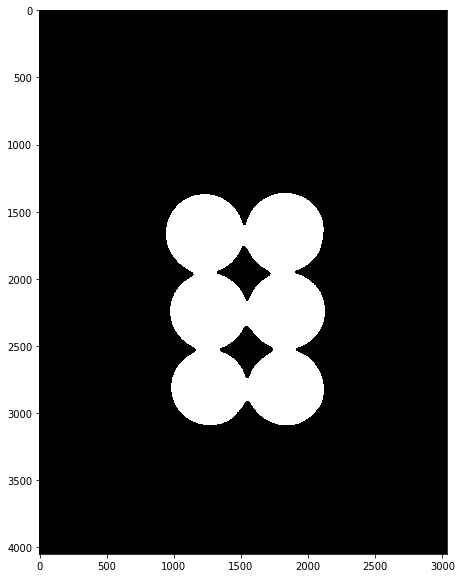

In [27]:
opening= cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=8)
display(thresh)

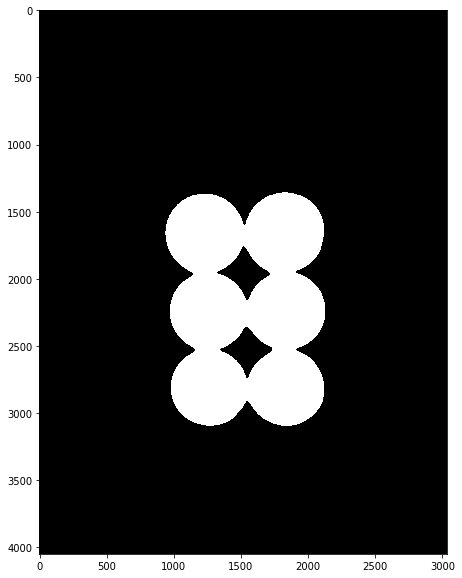

In [31]:
sure_bg= cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

In [28]:
#seeding
#distance transform
dist_transform= cv2.distanceTransform(opening, cv2.DIST_L2, 5)

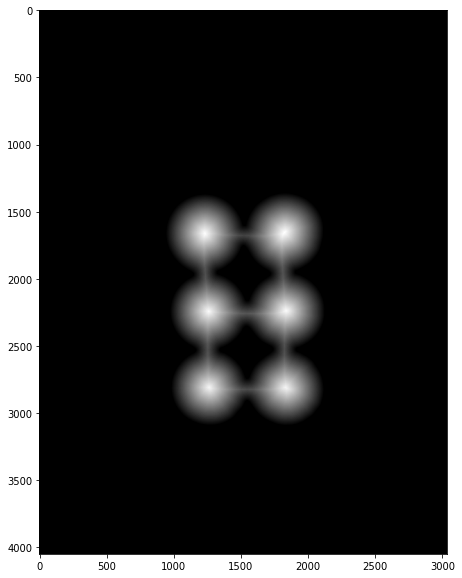

In [29]:
display(dist_transform)

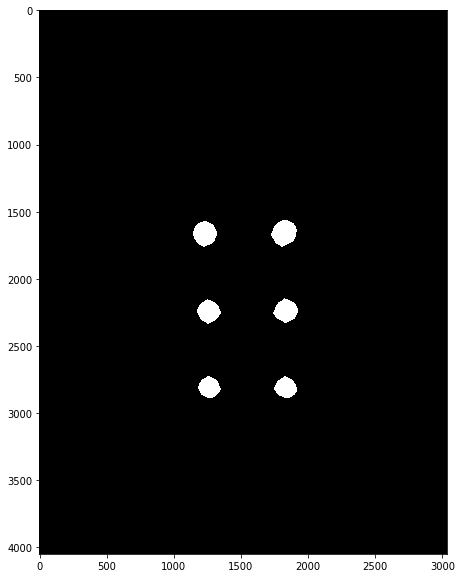

In [30]:
ret, sure_fg= cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

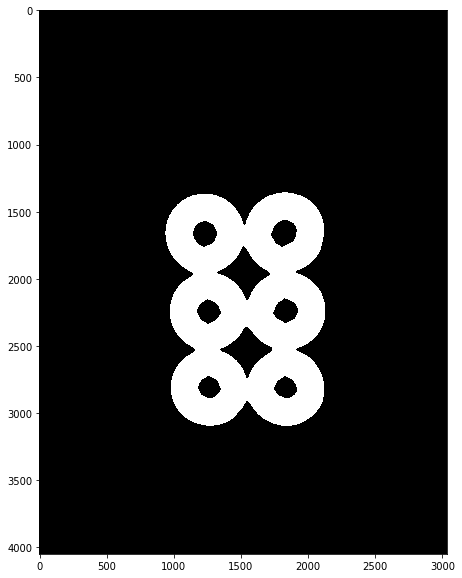

In [32]:
sure_fg= np.uint8(sure_fg)
unknown= cv2.subtract(sure_bg, sure_fg)
display(unknown)

In [33]:
#create label markers
#getting markers
ret, markers= cv2.connectedComponents(sure_fg)
markers= markers+1
markers[unknown==255]= 0
#watershed algo to markers
markers= cv2.watershed(img, markers)

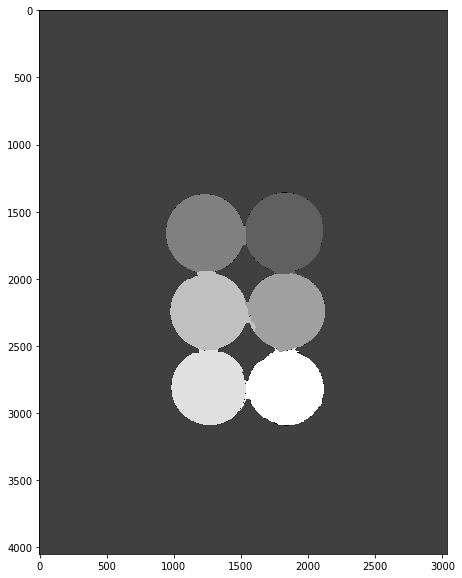

In [34]:
display(markers)

In [35]:
image, contours, hierarchy= cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3]== -1:
        cv2.drawContours(sep_coin, contours, i, (255,0,0), 10)

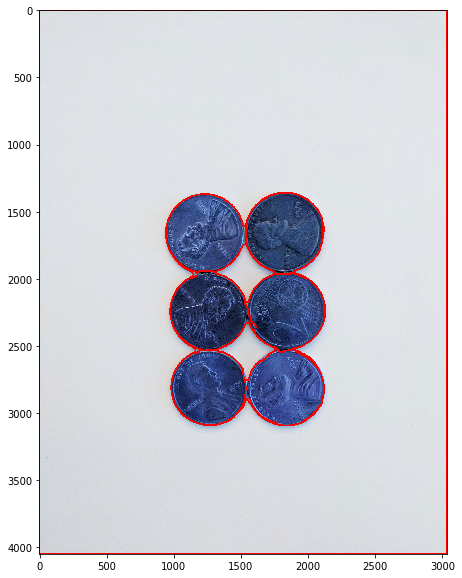

In [36]:
display(sep_coin)

# Custom seeds with watershed algo

In [2]:
road= cv2.imread('C:\\Users\\HP\\Downloads\\Dataset\\Computer-Vision-with-Python\\DATA/road_image.jpg')
road_copy= np.copy(road)

In [3]:
marker_image= np.zeros(road.shape[:2], dtype= np.int32)

In [4]:
segments= np.zeros(road.shape, dtype=np.uint8)

In [5]:
from matplotlib import cm

In [6]:
def create_rgb(i):
    tuple(np.array(cm.tab10(0)[:3])*255)

In [7]:
colors=[]
for i in range(10):
    colors.append(create_rgb(i))

In [8]:
##
#Global Varibles
#Color choice
current_marker= 1
#Marker updated by waterhsed
marks_updates= False

In [9]:
#Callback func
def mouse_callback(event, x,y,flags, param):
    global marks_updates
    
    if event== cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
    
        #User sees on the road image
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        
        marks_updates= True